In [8]:
import platform
import sys
from pathlib import Path
import importlib.metadata as meta
from collections import defaultdict

# 1. 系统 & Python
print("=" * 60)
print("操作系统平台:", platform.system(), platform.release())
print("Python 版本 :", sys.version)
print("=" * 60)

# 2. 收集「真正被 import 过」的第三方包
#    技巧：扫描当前 Python 解释器 site-packages 内的 top_level.txt
site_packages = Path(sys.executable).parent / "Lib" / "site-packages"
pkg_top = defaultdict(list)          # 包名 -> top_level 列表
for top_file in site_packages.glob("*/top_level.txt"):
    pkg_name = top_file.parent.name.split("-")[0]   # 粗略包名
    with top_file.open(encoding="utf-8") as f:
        top_levels = [line.strip() for line in f if line.strip()]
    pkg_top[pkg_name] = top_levels

# 当前已加载的模块中，属于第三方包的
imported_pkgs = set()
for mod_name in sys.modules:
    for pkg, tops in pkg_top.items():
        if mod_name in tops:
            imported_pkgs.add(pkg)
            break

# 3. 输出版本
print("已导入的第三方包及版本:")
for pkg in sorted(imported_pkgs):
    try:
        ver = meta.version(pkg)
        print(f"{pkg:<30} {ver}")
    except Exception:
        print(f"{pkg:<30} 版本检测失败")
print("=" * 60)

操作系统平台: Windows 10
Python 版本 : 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
已导入的第三方包及版本:
MarkupSafe                     3.0.2
PySocks                        1.7.1
PyYAML                         6.0.2
anyio                          4.10.0
asttokens                      3.0.0
astunparse                     1.6.3
brotli                         1.2.0
brotlicffi                     1.0.9.2
certifi                        2025.10.5
cffi                           2.0.0
charset_normalizer             3.3.2
cycler                         0.12.1
debugpy                        1.8.16
decorator                      5.2.1
defusedxml                     0.7.1
dill                           0.4.0
executing                      2.2.1
h11                            0.16.0
huggingface_hub                0.35.3
ipython                        8.30.0
jedi                           0.19.2
kiwisolver                     1.4.9
matplotlib_inline              0

数据集路径 : F:\Desktop\动物数据集
类别数量   : 23
图片总量   : 13711
------------------------------------------------------------
Turtle_Tortoise        1903 张
Jelly Fish              845 张
Dolphin                 782 张
Sharks                  590 张
Sea Urchins             579 张
Whale                   572 张
Octopus                 562 张
Puffers                 531 张
Sea Rays                517 张
Corals                  500 张
Nudibranchs             500 张
Otter                   500 张
Crabs                   499 张
Lobster                 499 张
Starfish                499 张
Clams                   497 张
Eel                     497 张
Fish                    494 张
Shrimp                  488 张
Squid                   483 张
Penguin                 482 张
Seahorse                478 张
Seal                    414 张
柱状图已保存 → dataset_stats.png
随机拼图已保存 → dataset_grid.png
运行完毕！


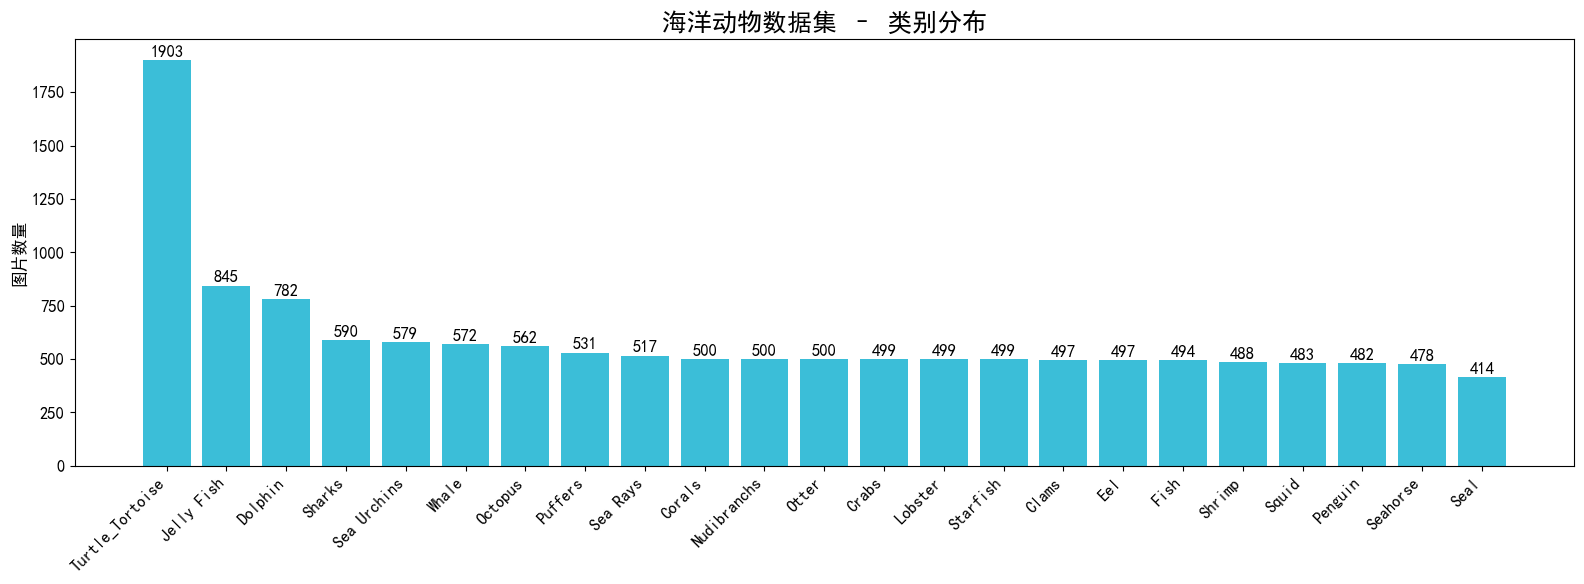

In [4]:
import os
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

# 指定 Windows 自带黑体
mpl.rcParams['font.family'] = 'SimHei'
# 解决负号显示为方块
mpl.rcParams['axes.unicode_minus'] = False
# 路径常量
DATA_ROOT = r"F:\Desktop\动物数据集"

# 1. 统计类别
cls_num = Counter()
for cls in os.listdir(DATA_ROOT):
    cls_dir = os.path.join(DATA_ROOT, cls)
    if os.path.isdir(cls_dir):
        n = len([f for f in os.listdir(cls_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
        cls_num[cls] = n

# 打印总览
print("=" * 60)
print(f"数据集路径 : {DATA_ROOT}")
print(f"类别数量   : {len(cls_num)}")
print(f"图片总量   : {sum(cls_num.values())}")
print("-" * 60)
for cls, n in cls_num.most_common():
    print(f"{cls:<20} {n:>6} 张")
print("=" * 60)

# 2. 柱状图
plt.rcParams['font.size'] = 12
plt.figure(figsize=(16, 6))
cls_names, cls_counts = zip(*cls_num.most_common())
bars = plt.bar(cls_names, cls_counts, color='#3bbed8')
plt.title("海洋动物数据集 – 类别分布", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("图片数量")
for bar, c in zip(bars, cls_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+5,
             str(c), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("dataset_stats.png", dpi=300)
print("柱状图已保存 → dataset_stats.png")

# 3. 随机拼图
GRID_COLS = 5                      # 每行 5 张
GRID_ROWS = len(cls_num)           # 一行一类
SAMPLE_PER_CLS = GRID_COLS
IMG_SIZE = 224                     # 单张缩略图尺寸

grid = Image.new('RGB', (IMG_SIZE * GRID_COLS, IMG_SIZE * GRID_ROWS), (255, 255, 255))
y = 0
for cls, _ in cls_num.most_common():
    cls_dir = os.path.join(DATA_ROOT, cls)
    imgs = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    samples = random.sample(imgs, min(SAMPLE_PER_CLS, len(imgs)))
    for idx, img_path in enumerate(samples):
        img = Image.open(img_path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
        grid.paste(img, (idx * IMG_SIZE, y))
    y += IMG_SIZE

grid.save("dataset_grid.png")
print("随机拼图已保存 → dataset_grid.png")
print("运行完毕！")

已保存 → one_per_class.png


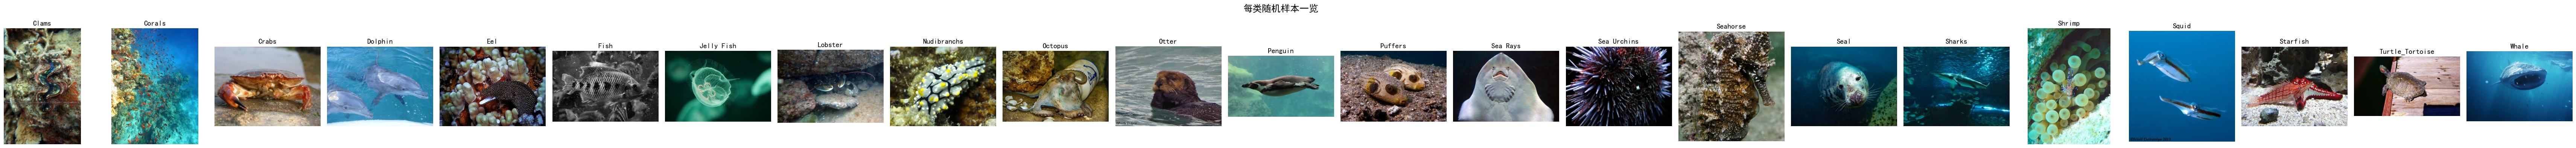

In [7]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.font_manager as fm

# 支持中文的字体（Windows 自带）
plt.rcParams['font.family'] = 'SimHei'        # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 负号正常显示

DATA_ROOT = r"F:\Desktop\动物数据集"
EXT = ('.png', '.jpg', '.jpeg', '.bmp')

# 扫描类别
classes = [c for c in os.listdir(DATA_ROOT)
           if os.path.isdir(os.path.join(DATA_ROOT, c))]
classes.sort()

# 画布：一行 N 列
N = len(classes)
fig, axes = plt.subplots(1, N, figsize=(N * 3, 4))

for ax, cls in zip(axes, classes):
    cls_dir = os.path.join(DATA_ROOT, cls)
    img_path = random.choice([f for f in os.listdir(cls_dir)
                              if f.lower().endswith(EXT)])
    img = Image.open(os.path.join(cls_dir, img_path)).convert('RGB')
    ax.imshow(img)
    ax.set_title(cls, fontsize=14)
    ax.axis('off')

plt.suptitle("每类随机样本一览", fontsize=18)
plt.tight_layout()
plt.savefig("one_per_class.png", dpi=300)
print("已保存 → one_per_class.png")

In [1]:
# 第一段：环境检查与数据加载
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# 检查是否有GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("使用设备:", device)

# 数据集路径
data_dir = r"F:\Desktop\动物数据集"

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 加载数据集
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
print("类别数量:", len(class_names))
print("类别名称:", class_names)

# 划分训练集和验证集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("训练集大小:", len(train_dataset))
print("验证集大小:", len(val_dataset))

使用设备: cuda
类别数量: 23
类别名称: ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']
训练集大小: 10968
验证集大小: 2743


In [2]:
# 第二段：构建模型
import torchvision.models as models
import torch.nn as nn

# 加载预训练模型
model = models.resnet18(pretrained=True)

# 冻结所有层（可选，先冻结，后续可解冻）
for param in model.parameters():
    param.requires_grad = False

# 替换最后一层为你这23类
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# 移动到GPU
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)  # 只训练最后一层

print("模型构建完成，结构如下：")
print(model.fc)

D:\Anaconda\envs\python3_10_18\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\envs\python3_10_18\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


模型构建完成，结构如下：
Linear(in_features=512, out_features=23, bias=True)


In [3]:
# 第三段：训练模型
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    avg_loss = running_loss / len(train_loader)

    # 验证集评估
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f} - Train Acc: {train_acc:.2f}% - Val Acc: {val_acc:.2f}%")

Epoch [1/5] - Loss: 1.4107 - Train Acc: 61.28% - Val Acc: 73.71%
Epoch [2/5] - Loss: 0.8713 - Train Acc: 74.63% - Val Acc: 75.36%
Epoch [3/5] - Loss: 0.7842 - Train Acc: 76.89% - Val Acc: 76.70%
Epoch [4/5] - Loss: 0.7285 - Train Acc: 78.24% - Val Acc: 76.27%
Epoch [5/5] - Loss: 0.6940 - Train Acc: 79.38% - Val Acc: 76.74%


In [4]:
# 第四段：继续训练 5 个 epoch（解冻部分层）
# 解冻 layer4 和 fc
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True

# 降低学习率
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

# 再训练 5 个 epoch
for epoch in range(5, 10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    avg_loss = running_loss / len(train_loader)

    # 验证集评估
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/10] - Loss: {avg_loss:.4f} - Train Acc: {train_acc:.2f}% - Val Acc: {val_acc:.2f}%")

Epoch [6/10] - Loss: 0.6648 - Train Acc: 79.86% - Val Acc: 80.93%
Epoch [7/10] - Loss: 0.2191 - Train Acc: 94.16% - Val Acc: 80.75%
Epoch [8/10] - Loss: 0.0907 - Train Acc: 98.42% - Val Acc: 81.41%
Epoch [9/10] - Loss: 0.0529 - Train Acc: 99.21% - Val Acc: 81.81%
Epoch [10/10] - Loss: 0.0381 - Train Acc: 99.35% - Val Acc: 82.06%


In [6]:
# 第五段：保存模型 + 手动预测函数
import torch
from PIL import Image
import torchvision.transforms as transforms
import os

# 保存模型
torch.save(model.state_dict(), "marine_animal_model.pth")
print("模型已保存为 marine_animal_model.pth")

# 预测函数
def predict_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)
        label = class_names[predicted.item()]

    # 显示图片和预测结果
    display(image)
    print(f"预测结果：{label}")
    return label

模型已保存为 marine_animal_model.pth


In [7]:
# 第六段：安装 Gradio 并构建交互系统
# 先安装 gradio
!pip install gradio

In [1]:
# 一键预测（Gradio版，含建模型）
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------- 重建模型结构 -----------
model = torch.hub.load('pytorch/vision:v0.14.0', 'resnet18', weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 23)
model.load_state_dict(torch.load("marine_animal_model.pth", map_location=device))
model.to(device)
model.eval()

# ----------- 类别 -----------
class_names = ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish',
               'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter',
               'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse',
               'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish',
               'Turtle_Tortoise', 'Whale']

# ----------- 预测 -----------
def predict_image(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image = image.convert("RGB")
    x = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        logits = model(x) / 5.0
        probs = torch.softmax(logits, dim=1)
        top3 = torch.topk(probs[0], 3)
    return {class_names[i]: float(v) for i, v in zip(top3.indices, top3.values)}

# ----------- 启动网页 -----------
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="🐠 海洋动物识别",
    description="上传照片即可看到 Top-3 类别和置信度"
).launch(share=True)

D:\Anaconda\envs\python3_10_18\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\Administrator/.cache\torch\hub\pytorch_vision_v0.14.0


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: C:\Users\Administrator\.cache\huggingface\gradio\frpc\frpc_windows_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.3
3. Move the file to this location: C:\Users\Administrator\.cache\huggingface\gradio\frpc
